In [76]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("pokemon1.txt")
#changing in txt editor and save as UTF-8

In [2]:
df.head()

,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,BUDDY_DISTANCE,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,3.0,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,3.0,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png
2,3,Venusaur,Bisaflor,Florizarre,Fushigibana,Isanghaekkot,Grass,Poison,1.0,NaN,3.0,190.0,198.0,189.0,2720.0,"5,00 %","5,00 %",Yes,./icon/003.png,./sprites/003.png
3,4,Charmander,Glumanda,Salamèche,Hitokage,Pairi,Fire,NaN,1.0,25.0,3.0,118.0,116.0,93.0,980.0,"20,00 %","10,00 %",Yes,./icon/004.png,./sprites/004.png
4,5,Charmeleon,Glutexo,Reptincel,Lizardo,Rijadeu,Fire,NaN,1.0,100.0,3.0,151.0,158.0,126.0,1653.0,"10,00 %","7,00 %",Yes,./icon/005.png,./sprites/005.png


In [18]:
G = nx.Graph()
G.add_nodes_from(df.NAME_ENGLISH)


In [19]:
len(G) #number of nodes

809

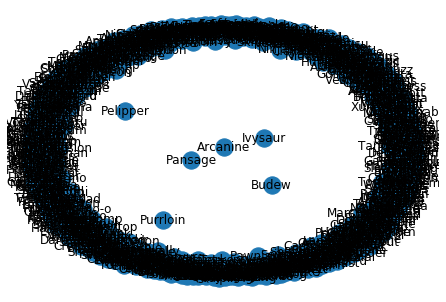

In [20]:
nx.draw(G, dim=100, with_labels=True)

In [21]:
df.dtypes #relevant variables for regression are float/numeric, no further adjustment needed

#                  object
NAME_ENGLISH       object
NAME_GERMAN        object
NAME_FRENCH        object
NAME_JAPAN         object
NAME_KOREAN        object
TYP1               object
TYP2               object
GENERATION        float64
CANDY             float64
BUDDY_DISTANCE    float64
MAX_HP            float64
MAX_ATT           float64
MAX_DEF           float64
MAX_CP            float64
CATCH_RATE         object
ESCAPE_RATE        object
SHINY              object
ICON_PATH          object
SPRITE_PATH        object
dtype: object

In [36]:
df.shape

(842, 20)

In [42]:
df1=df.dropna() #erase the N/A values

In [43]:
df1.head()

,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,BUDDY_DISTANCE,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,3.0,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,3.0,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png
12,13,Weedle,Hornliu,Aspicot,Beedle,Ppulchungi,Bug,Poison,1.0,12.0,1.0,120.0,63.0,50.0,456.0,"50,00 %","20,00 %",No,./icon/013.png,./sprites/013.png
13,14,Kakuna,Kokuna,Coconfort,Cocoon,Ttakchungi,Bug,Poison,1.0,50.0,1.0,128.0,46.0,75.0,432.0,"25,00 %","9,00 %",No,./icon/014.png,./sprites/014.png
15,16,Pidgey,Taubsi,Roucool,Poppo,Gugu,Normal,Flying,1.0,12.0,1.0,120.0,85.0,73.0,680.0,"50,00 %","20,00 %",No,./icon/016.png,./sprites/016.png


In [45]:
H = nx.Graph()
H.add_nodes_from(df1.NAME_ENGLISH)
len(H)

91

In [51]:
H.number_of_edges() # interpretation: simple connection between 2 nodes

92

In [59]:
a=1
b=2
c=3
H.add_edge(a,b, weight= c)

for a,b,c in zip(df1.NAME_ENGLISH,df1.NAME_ENGLISH, df1.MAX_CP):
       H.add_edge(a,b, weight= c)

H.degree(weight='weight')
degree=H.degree()
print(degree) #degree definition: number of nodes, one node is connected to;
#only 2 connections - not relevant to further exploration

[('Bulbasaur', 2), ('Ivysaur', 2), ('Weedle', 2), ('Kakuna', 2), ('Pidgey', 2), ('Pidgeotto', 2), ('Spearow', 2), ('Jigglypuff', 2), ('Zubat', 2), ('Golbat', 2), ('Oddish', 2), ('Gloom', 2), ('Paras', 2), ('Venonat', 2), ('Bellsprout', 2), ('Weepinbell', 2), ('Tentacool', 2), ('Geodude', 2), ('Graveler', 2), ('Slowpoke', 2), ('Magnemite', 2), ('Doduo', 2), ('Gastly', 2), ('Haunter', 2), ('Onix', 2), ('Exeggcute', 2), ('Rhyhorn', 2), ('Rhydon', 2), ('Scyther', 2), ('Omanyte', 2), ('Kabuto', 2), ('Hoothoot', 2), ('Ledyba', 2), ('Spinarak', 2), ('Chinchou', 2), ('Togetic', 2), ('Natu', 2), ('Marill', 2), ('Hoppip', 2), ('Skiploom', 2), ('Wooper', 2), ('Murkrow', 2), ('Gligar', 2), ('Sneasel', 2), ('Swinub', 2), ('Houndour', 2), ('Larvitar', 2), ('Pupitar', 2), ('Combusken', 2), ('Marshtomp', 2), ('Lotad', 2), ('Lombre', 2), ('Nuzleaf', 2), ('Tailow', 2), ('Wingull', 2), ('Ralts', 2), ('Kirlia', 2), ('Surskit', 2), ('Nincada', 2), ('Azurill', 2), ('Aron', 2), ('Lairon', 2), ('Meditite', 2)

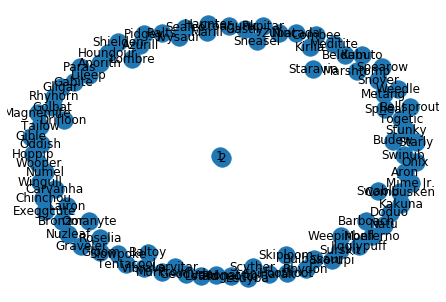

In [56]:
nx.draw(H, dim=100, with_labels=True)

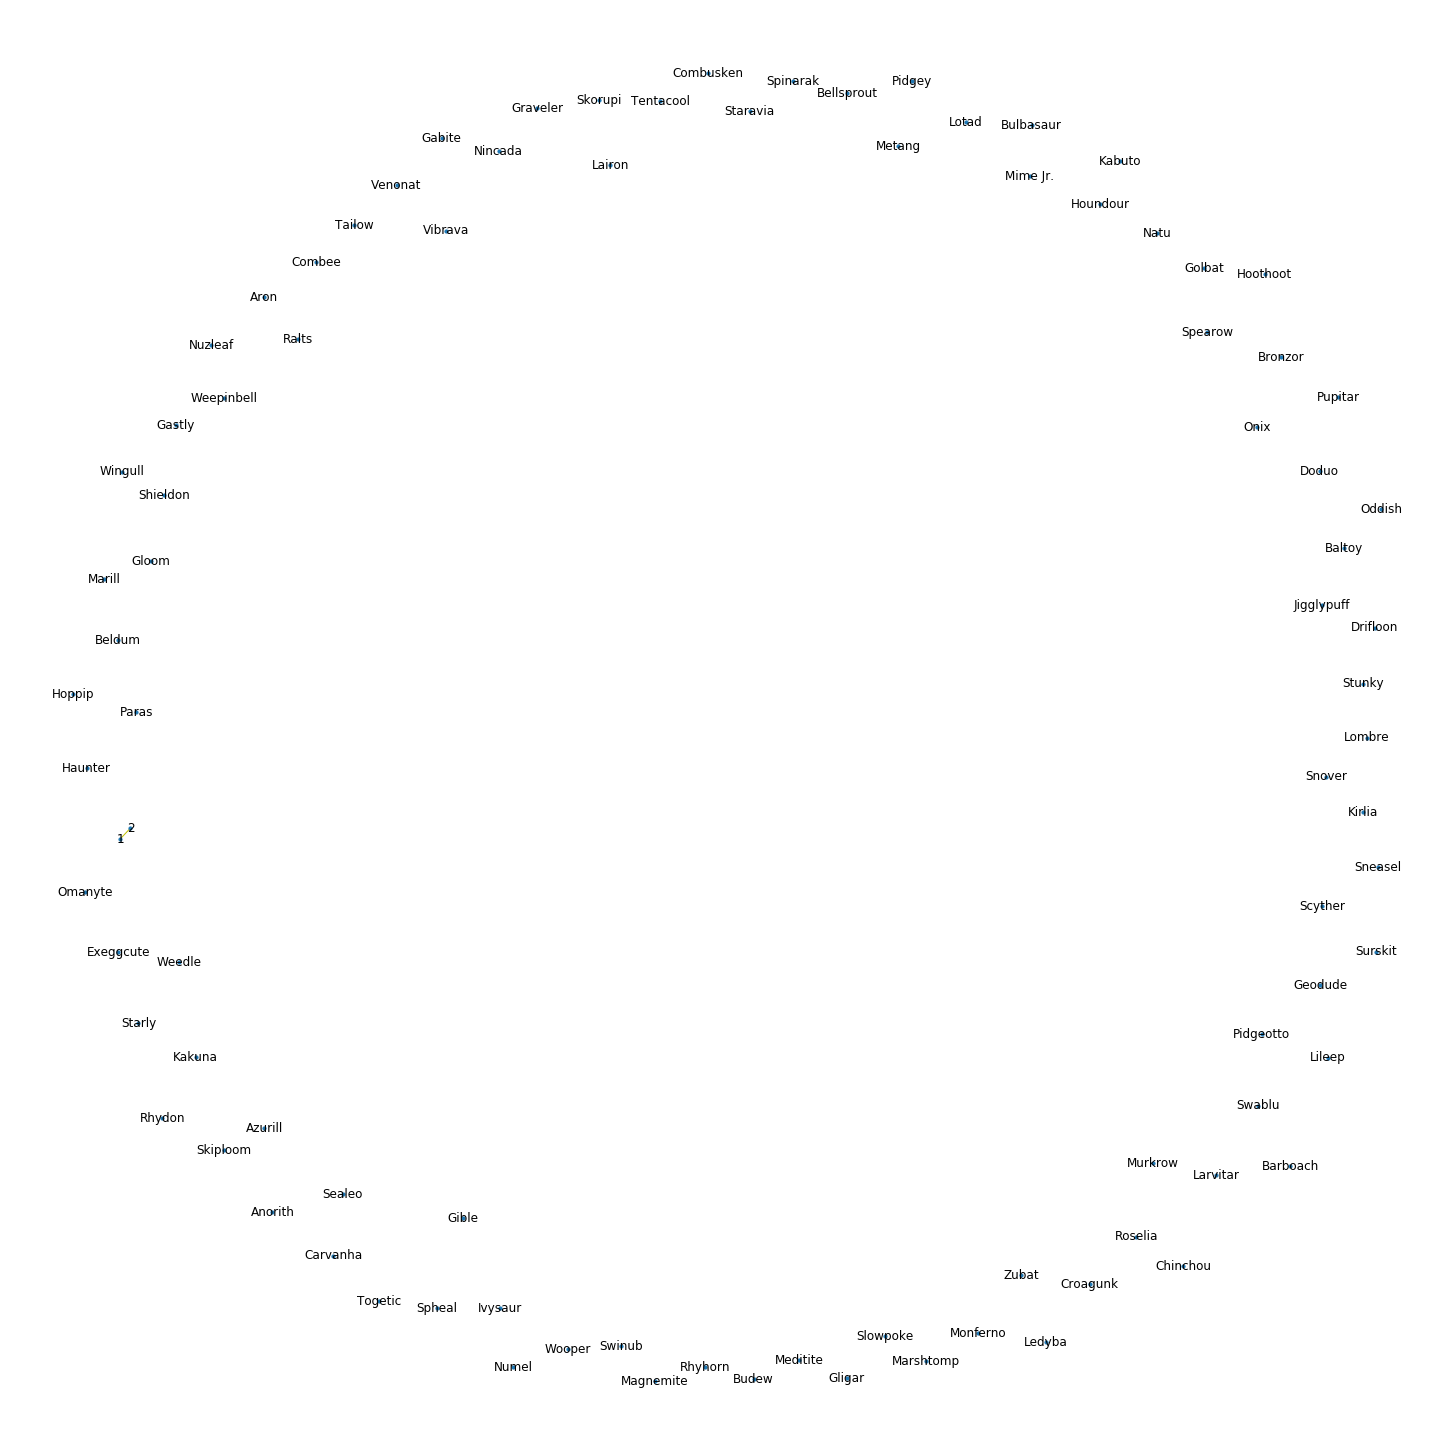

In [57]:
plt.figure(figsize=(20, 20))
po1 = nx.spring_layout(H,scale=2)
nx.draw(H, node_size=10, pos=po1, edge_color='y', label='r', with_labels=True)
plt.show()
#network graph emphasizes conclusions above about the edges

In [68]:
df1.TYP1.unique() #which types1 are there

array(['Grass', 'Bug', 'Normal', 'Poison', 'Water', 'Rock', 'Electric',
       'Ghost', 'Ground', 'Fairy', 'Psychic', 'Dark', 'Ice', 'Fire',
       'Steel', 'Fighting', 'Dragon'], dtype=object)

In [69]:
len(df1.TYP1.unique()) #how many different types1 (numeric)

17

In [70]:
df1.TYP2.unique()

array(['Poison', 'Flying', 'Fairy', 'Grass', 'Ground', 'Psychic', 'Steel',
       'Rock', 'Water', 'Electric', 'Ice', 'Fire', 'Fighting', 'Dark',
       'Dragon', 'Bug'], dtype=object)

In [71]:
len(df1.TYP2.unique())

16

In [72]:
YX=df1[['MAX_CP','MAX_HP','MAX_ATT','MAX_DEF']]

In [73]:
YX.head()

,MAX_CP,MAX_HP,MAX_ATT,MAX_DEF
0,1115.0,128.0,118.0,111.0
1,1699.0,155.0,151.0,143.0
12,456.0,120.0,63.0,50.0
13,432.0,128.0,46.0,75.0
15,680.0,120.0,85.0,73.0


In [74]:
Y=YX['MAX_CP']
X=YX[['MAX_HP','MAX_ATT','MAX_DEF']]

In [83]:
#Create model
lm = LinearRegression()

#fit the model YX dataframe
model=lm.fit(X,Y)

In [85]:
model.intercept_ 

-956.5757115280333

In [86]:
#coefficients of the independent variables MAX_HP, MAX_ATT and MAX_DEF
#positive relation with the dependent variable MAX_CP
model.coef_ 

array([4.1596096 , 8.74539729, 4.59760506])

In [88]:
#R squared - measure of fix is high,good sign
model.score(X,Y)

0.9664330639930848

Text(0, 0.5, 'Power of Combat')

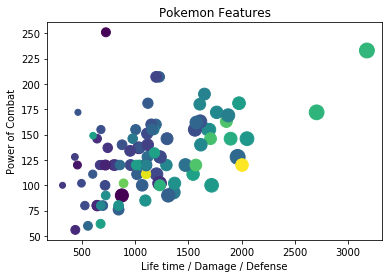

In [100]:
# plot the all the values of the model
import matplotlib.pyplot as plt 
plt.scatter(df1['MAX_CP'], df1['MAX_HP'], df1['MAX_ATT'], df1['MAX_DEF'])
plt.title('Pokemon Features')
plt.xlabel('Life time / Damage / Defense')
plt.ylabel('Power of Combat')



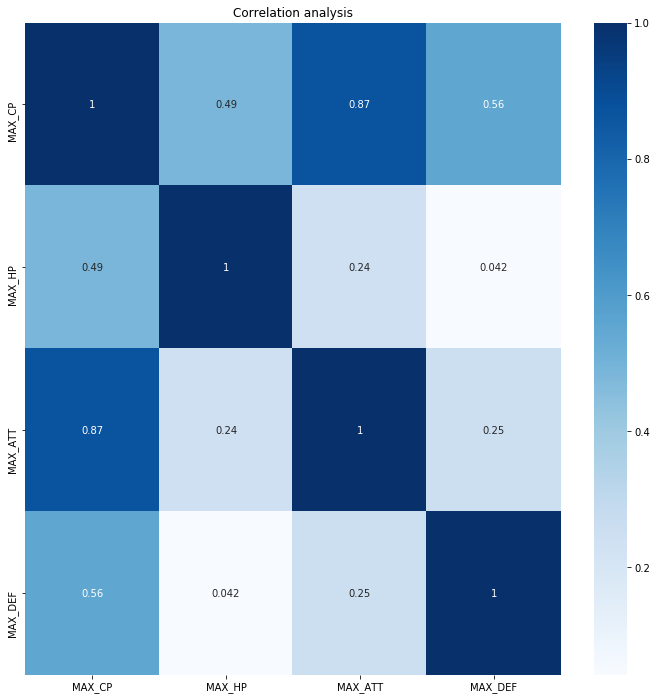

In [97]:
#Analysing the correlation between the variables
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[12, 12])
corr_mtx = YX.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

#Correlations are low. no further adjustment to the model needed

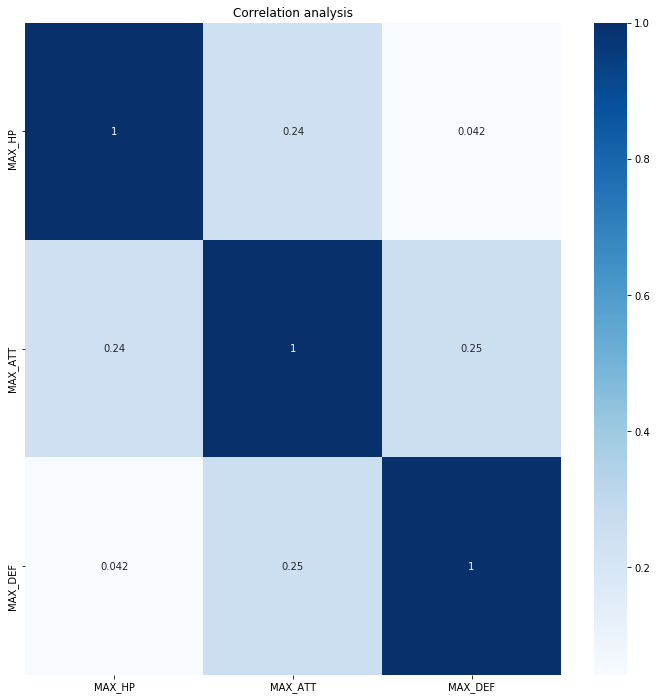

In [101]:
#correlation table: adjusted view - correlations displayed only among independent variables 
fig = plt.figure(figsize=[12, 12])
corr_mtx = X.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()